### Installing mlxtend.

In [5]:
!pip install mlxtend

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)


### Importing all the necessary libraries.

In [81]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

### Loading data into data dataframe.

In [32]:
#Loading data into the datafrane and checking it over the top.

data = pd.read_csv('brain_stroke.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# Data-Preprocessing.

In [33]:
data['gender'] = data['gender'].replace({'Male':1,'Female':0})

In [40]:
data['ever_married'] = data['ever_married'].replace({'Yes':1,'No':0})

In [60]:
data['work_type'] = data['work_type'].replace({'Private':1,'Govt_job':0,'Self-employed':2,'children':3})

In [61]:
data['Residence_type'] = data['Residence_type'].replace({'Urban':1,'Rural':0})

In [63]:
data['smoking_status'] = data['smoking_status'].replace({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3})

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   float64
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 428.2 KB


# Data Cleaning.

In [69]:
data.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [70]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Exploratory Data Analysis to determine causes of stroke using different Machine learning Models.

### Identifying Target Data.

In [65]:
# Independent Variables
X = data.drop(['stroke'], axis = 1)
y = data['stroke']
X = np.array(X)
y = np.array(y)

### Splitting data into Training  and Testing data.

In [66]:
from sklearn.model_selection import train_test_split
# Let us split our dataset into test and train groups with  8:2 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 10)

### Creating an Array for all the required models.

In [67]:
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
nb_model = GaussianNB()
lda_model = LinearDiscriminantAnalysis()
qda_model = LinearDiscriminantAnalysis()

### Calculating Accuracy, Precision Score, Recall Score and F1 Score of all the features by using KNN Model.

In [78]:
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_knn)
print("Accuracy of the KNN model:",accuracy_score(y_true, y_pred_knn))
print("Precision Score of the KNN model:",precision_score(y_true, y_pred_knn))
print("Recall Score of the KNN model:",recall_score(y_true, y_pred_knn))
print("F1 Score of the KNN model:",f1_score(y_true, y_pred_knn))

Accuracy of the KNN model: 0.9546275848223248
Precision Score of the KNN model: 0.6195652173913043
Recall Score of the KNN model: 0.22983870967741934
F1 Score of the KNN model: 0.33529411764705874


### Building Confusion Matrix.

Test Data Accuracy: 0.9546


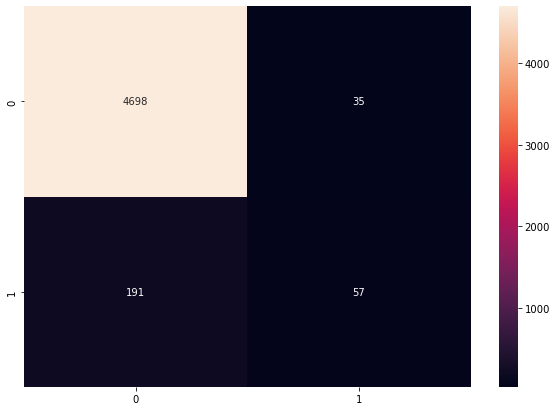

In [82]:
df_cm = pd.DataFrame(cf_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_true, y_pred_knn))

### Calculating Accuracy, Precision Score, Recall Score and F1 Score of all the features by using DecisionTree Model.

In [86]:
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_dt)
print("Accuracy of the DecisionTree model:",accuracy_score(y_true, y_pred_dt))
print("Precision Score of the DecisionTree model:",precision_score(y_true, y_pred_dt))
print("Recall Score of the DecisionTree model:",recall_score(y_true, y_pred_dt))
print("F1 Score of the DecisionTree model:",f1_score(y_true, y_pred_dt))

Accuracy of the DecisionTree model: 0.983135916482634
Precision Score of the DecisionTree model: 0.8306451612903226
Recall Score of the DecisionTree model: 0.8306451612903226
F1 Score of the DecisionTree model: 0.8306451612903226


### Building Confusion Matrix.

Test Data Accuracy: 0.9825


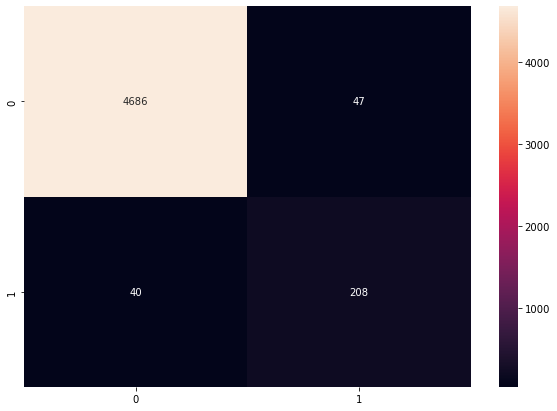

In [84]:
df_cm = pd.DataFrame(cf_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_true, y_pred_dt))

### Calculating Accuracy, Precision Score, Recall Score and F1 Score of all the features by using RandomForest Model.

In [85]:
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_rf)
print("Accuracy of the RandomForest model:",accuracy_score(y_true, y_pred_rf))
print("Precision Score of the RandomForest model:",precision_score(y_true, y_pred_rf))
print("Recall Score of the RandomForest model:",recall_score(y_true, y_pred_rf))
print("F1 Score of the RandomForest model:",f1_score(y_true, y_pred_rf))

Accuracy of the RandomForest model: 0.9897610921501706
Precision Score of the RandomForest model: 0.9900497512437811
Recall Score of the RandomForest model: 0.8024193548387096
F1 Score of the RandomForest model: 0.88641425389755


### Building Confusion Matrix.

Test Data Accuracy: 0.9898


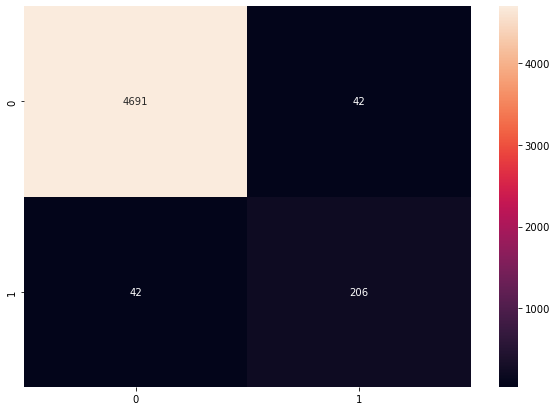

In [87]:
df_cm = pd.DataFrame(cf_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_true, y_pred_rf))

### Calculating Accuracy, Precision Score, Recall Score and F1 Score of all the features by using NaiveBayes Model.

In [88]:
nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_nb)
print("Accuracy of the NaiveBayes model:",accuracy_score(y_true, y_pred_nb))
print("Precision Score of the NaiveBayes model:",precision_score(y_true, y_pred_nb))
print("Recall Score of the NaiveBayes model:",recall_score(y_true, y_pred_nb))
print("F1 Score of the NaiveBayes model:",f1_score(y_true, y_pred_nb))

Accuracy of the NaiveBayes model: 0.8612728367797631
Precision Score of the NaiveBayes model: 0.1597542242703533
Recall Score of the NaiveBayes model: 0.41935483870967744
F1 Score of the NaiveBayes model: 0.2313681868743048


### Building Confusion Matrix.

Test Data Accuracy: 0.8613


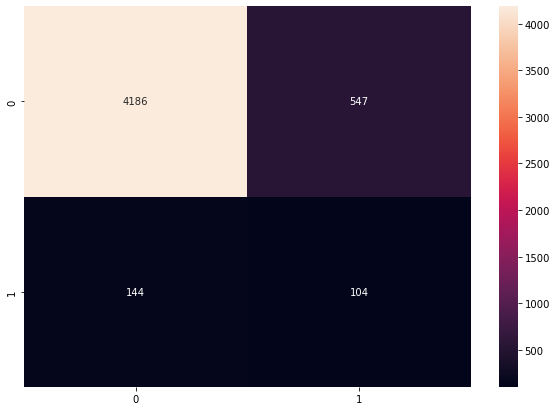

In [89]:
df_cm = pd.DataFrame(cf_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_true, y_pred_nb))

### Calculating Accuracy, Precision Score, Recall Score and F1 Score of all the features by using LDA Model.

In [90]:
lda_model.fit(X_train,y_train)
y_pred_lda = lda_model.predict(X)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_lda)
print("Accuracy of the LDA model:",accuracy_score(y_true, y_pred_lda))
print("Precision Score of the LDA model:",precision_score(y_true, y_pred_lda))
print("Recall Score of the LDA model:",recall_score(y_true, y_pred_lda))
print("F1 Score of the LDA model:",f1_score(y_true, y_pred_lda))

Accuracy of the LDA model: 0.9457940172656093
Precision Score of the LDA model: 0.3103448275862069
Recall Score of the LDA model: 0.07258064516129033
F1 Score of the LDA model: 0.11764705882352942


### Building Confusion Matrix.

Test Data Accuracy: 0.9458


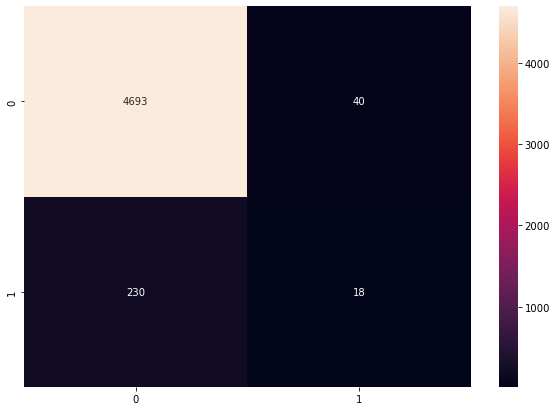

In [91]:
df_cm = pd.DataFrame(cf_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_true, y_pred_lda))

### Calculating Accuracy, Precision Score, Recall Score and F1 Score of all the features by using QDA Model.

In [92]:
qda_model.fit(X_train,y_train)
y_pred_qda = qda_model.predict(X)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_qda)
print("Accuracy of the QDA model:",accuracy_score(y_true, y_pred_qda))
print("Precision Score of the QDA model:",precision_score(y_true, y_pred_qda))
print("Recall Score of the QDA model:",recall_score(y_true, y_pred_qda))
print("F1 Score of the QDA model:",f1_score(y_true, y_pred_qda))

Accuracy of the QDA model: 0.9457940172656093
Precision Score of the QDA model: 0.3103448275862069
Recall Score of the QDA model: 0.07258064516129033
F1 Score of the QDA model: 0.11764705882352942


### Building Confusion Matrix.

Test Data Accuracy: 0.9458


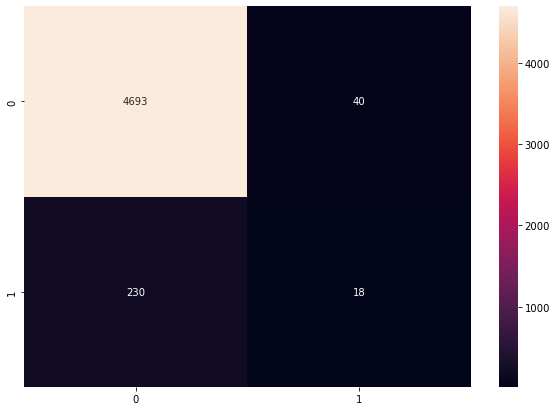

In [93]:
df_cm = pd.DataFrame(cf_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_true, y_pred_qda))

### Creating an Array for all the models.

In [121]:
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
nb_model = GaussianNB()
lda_model = LinearDiscriminantAnalysis()
qda_model = LinearDiscriminantAnalysis()

### Calculating the performances of the KNN model using the best features that are selected with “Sequential floating forward selection (SFFS)” feature selection method and also calculating Sensitivity, Specificity and Total Accuracy.

In [128]:
sffs_knn = SFS(knn_model, 
          k_features=(1,10), 
          forward=True,  # Forward
          floating=True,  #Floating
          scoring='accuracy',
          cv=5)
X_new = sffs_knn.fit_transform(X,y)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [130]:
knn_model.fit(X_train_n,y_train)
y_pred_knn_sffs = knn_model.predict(X_new)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_knn_sffs)

FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

Sensitivity_knn_sffs = TP / (TP + FN)
Specificity_knn_sffs = TN / (TN + FP)
Total_Accuracy_knn_sffs = (TP + TN) / (TP + FP + FN + TN)
print("Sensitivity of the SFFS_KNN model:",Sensitivity_knn_sffs,"\n","Specificity of the SFFS_KNN model:",Specificity_knn_sffs,"\n","Accuracy of the SFFS_KNN model:",Total_Accuracy_knn_sffs)


Sensitivity of the SFFS_KNN model: [0.9964082  0.10080645] 
 Specificity of the SFFS_KNN model: [0.10080645 0.9964082 ] 
 Accuracy of the SFFS_KNN model: [0.9518169 0.9518169]


### Calculating the performances of the DecisionTree model using the best features that are selected with “Sequential floating forward selection (SFFS)” feature selection method and also calculating Sensitivity, Specificity and Total Accuracy.

In [131]:
sffs_dt = SFS(dt_model, 
          k_features=(1,10), 
          forward=True,  # Forward
          floating=True,  #Floating
          scoring='accuracy',
          cv=5)
X_new = sffs_dt.fit_transform(X,y)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [134]:
dt_model.fit(X_train_n,y_train_n)
y_pred_dt_sffs = dt_model.predict(X_new)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_dt_sffs)
FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

Sensitivity_dt_sffs = TP / (TP + FN)
Specificity_dt_sffs = TN / (TN + FP)
Total_Accuracy_dt_sffs = (TP + TN) / (TP + FP + FN + TN)
print("Sensitivity of the SFFS_DT model:",Sensitivity_dt_sffs,"\n","Specificity of the SFFS_DT model:",Specificity_dt_sffs,"\n","Accuracy of the SFFS_DT model:",Total_Accuracy_dt_sffs)


Sensitivity of the SFFS_DT model: [1.         0.00806452] 
 Specificity of the SFFS_DT model: [0.00806452 1.        ] 
 Accuracy of the SFFS_DT model: [0.95061233 0.95061233]


### Calculating the performances of the RandomForest model using the best features that are selected with “Sequential floating forward selection (SFFS)” feature selection method and also calculating Sensitivity, Specificity and Total Accuracy.

In [135]:
sffs_rf = SFS(rf_model, 
          k_features=(1,10), 
          forward=True,  # Forward
          floating=True,  #Floating
          scoring='accuracy',
          cv=5)
X_new = sffs_rf.fit_transform(X,y)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [136]:
rf_model.fit(X_train_n,y_train_n)
y_pred_rf_sffs = rf_model.predict(X_new)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_rf_sffs)
cf_matrix = confusion_matrix(y_true, y_pred_dt_sffs)
FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

Sensitivity_rf_sffs = TP / (TP + FN)
Specificity_rf_sffs = TN / (TN + FP)
Total_Accuracy_rf_sffs = (TP + TN) / (TP + FP + FN + TN)
print("Sensitivity of the SFFS_RF model:",Sensitivity_rf_sffs,"\n","Specificity of the SFFS_RF model:",Specificity_rf_sffs,"\n","Accuracy of the SFFS_RF model:",Total_Accuracy_rf_sffs)


Sensitivity of the SFFS_RF model: [1.         0.00806452] 
 Specificity of the SFFS_RF model: [0.00806452 1.        ] 
 Accuracy of the SFFS_RF model: [0.95061233 0.95061233]


### Calculating the performances of the NaiveBayes model using the best features that are selected with “Sequential floating forward selection (SFFS)” feature selection method and also calculating Sensitivity, Specificity and Total Accuracy. 

In [126]:
sffs_nb = SFS(nb_model, 
          k_features=(1,10), 
          forward=True,  # Forward
          floating=True,  #Floating
          scoring='accuracy',
          cv=5)
X_new = sffs_nb.fit_transform(X,y)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [137]:
nb_model.fit(X_train_n,y_train_n)
y_pred_nb_sffs = nb_model.predict(X_new)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_nb_sffs)
FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

Sensitivity_nb_sffs = TP / (TP + FN)
Specificity_nb_sffs = TN / (TN + FP)
Total_Accuracy_nb_sffs = (TP + TN) / (TP + FP + FN + TN)
print("Sensitivity of the SFFS_NB model:",Sensitivity_nb_sffs,"\n","Specificity of the SFFS_NB model:",Specificity_nb_sffs,"\n","Accuracy of the SFFS_NB model:",Total_Accuracy_nb_sffs)



Sensitivity of the SFFS_NB model: [0.95182759 0.18951613] 
 Specificity of the SFFS_NB model: [0.18951613 0.95182759] 
 Accuracy of the SFFS_NB model: [0.91387272 0.91387272]


### Calculating the performances of the LDA model using the best features that are selected with “Sequential floating forward selection (SFFS)” feature selection method and also calculating Sensitivity, Specificity and Total Accuracy.

In [138]:
sffs_lda = SFS(lda_model, 
          k_features=(1,10), 
          forward=True,  # Forward
          floating=True,  #Floating
          scoring='accuracy',
          cv=5)
X_new = sffs_lda.fit_transform(X,y)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [139]:
lda_model.fit(X_train_n,y_train_n)
y_pred_lda = lda_model.predict(X_new)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_lda)

FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

Sensitivity_lda_sffs = TP / (TP + FN)
Specificity_lda_sffs = TN / (TN + FP)
Total_Accuracy_lda_sffs = (TP + TN) / (TP + FP + FN + TN)
print("Sensitivity of the SFFS_LDA model:",Sensitivity_lda_sffs,"\n","Specificity of the SFFS_LDA model:",Specificity_lda_sffs,"\n","Accuracy of the SFFS_LDA model:",Total_Accuracy_lda_sffs)

Sensitivity of the SFFS_LDA model: [1. 0.] 
 Specificity of the SFFS_LDA model: [0. 1.] 
 Accuracy of the SFFS_LDA model: [0.9502108 0.9502108]


### Calculating the performances of the QDA model using the best features that are selected with “Sequential floating forward selection (SFFS)” feature selection method and also calculating Sensitivity, Specificity and Total Accuracy.

In [140]:
sffs_qda = SFS(qda_model, 
          k_features=(1,10), 
          forward=True,  # Forward
          floating=True,  #Floating
          scoring='accuracy',
          cv=5)
X_new = sffs_qda.fit_transform(X,y)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [141]:
qda_model.fit(X_train_n,y_train_n)
y_pred_qda = qda_model.predict(X_new)
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred_qda)

FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

Sensitivity_qda_sffs = TP / (TP + FN)
Specificity_qda_sffs = TN / (TN + FP)
Total_Accuracy_qda_sffs = (TP + TN) / (TP + FP + FN + TN)
print("Sensitivity of the SFFS_QDA model:",Sensitivity_qda_sffs,"\n","Specificity of the SFFS_QDA model:",Specificity_qda_sffs,"\n","Accuracy of the SFFS_QDA model:",Total_Accuracy_qda_sffs)

Sensitivity of the SFFS_QDA model: [1. 0.] 
 Specificity of the SFFS_QDA model: [0. 1.] 
 Accuracy of the SFFS_QDA model: [0.9502108 0.9502108]


# Conclusion: Random Forest Classifier model has the best performance among all the models using all the 11 features, Accuracy of the RandomForest model: 0.98, Precision Score of the RandomForest model: 0.99, Recall Score of the RandomForest model: 0.80, F1 Score of the RandomForest model: 0.88. It was the best performing model even after performing feature engineering.